<a href="https://colab.research.google.com/github/kaholict/Karpov-Course/blob/main/K_C_lesson_3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
user_data_df = pd.read_csv('/content/user_data.csv')
logs_df = pd.read_csv('/content/logs.csv')

user_data:

client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст

logs:

client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix

In [ ]:
user_data_df.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [ ]:
user_data_df.shape

(2954, 3)

In [ ]:
user_data_df.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [ ]:
logs_df.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
logs_df.shape

(4500, 4)

In [ ]:
logs_df.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

Проверим, какой клиент совершил наибольшее число успешных операций.

In [ ]:
temp = logs_df.query('success == True').groupby('client', as_index=False).agg({'success': 'count'})  # .sort_values('success', ascending=False)
success_clients = [temp.client[i] for i in range(len(temp.success)) if temp.success[i] == temp.success.max()]
success_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы осуществляется наибольшее количество успешных операций?

In [ ]:
temp1 = logs_df.query('success == True').groupby('platform', as_index=False).agg({'success': 'count'}).sort_values('success', ascending=False)  # .sort_values('success', ascending=False)

In [ ]:
top_platform = temp1.platform[0]
top_platform

'computer'

Какую платформу предпочитают премиумные клиенты?

In [ ]:
temp1 = logs_df.query('success == True').groupby('platform', as_index=False).agg({'success': 'count'}).sort_values('success', ascending=False).sort_values('success', ascending=False)

In [ ]:
merge_group = user_data_df.merge(logs_df, how='left')
merge_group.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [ ]:
merge_group.query('premium == True').groupby('platform').agg({'premium': 'count'}).idxmax()[0]

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
merge_group.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


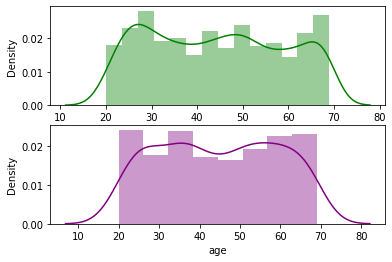

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(merge_group.query('premium == False').age, ax=ax[0], color='green',)
sns.distplot(merge_group.query('premium == True').age, ax=ax[1], color='purple')

Постройте график распределения числа успешных операций


In [ ]:
clients_vs_success_number = merge_group.groupby('client').agg({'success': 'sum'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


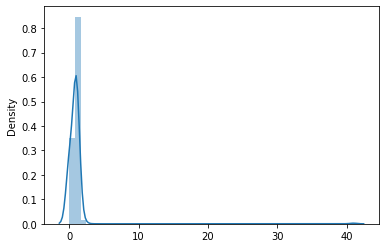

In [ ]:
sns.distplot(clients_vs_success_number)

In [ ]:
clients_vs_success_number.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64


Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [ ]:
dist_success_by_age = merge_group.query('platform == "computer"').groupby('age', as_index=False).agg({'success': 'sum'})
dist_success_by_age.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


In [ ]:
computer_success = merge_group.query('platform == "computer" and success == True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


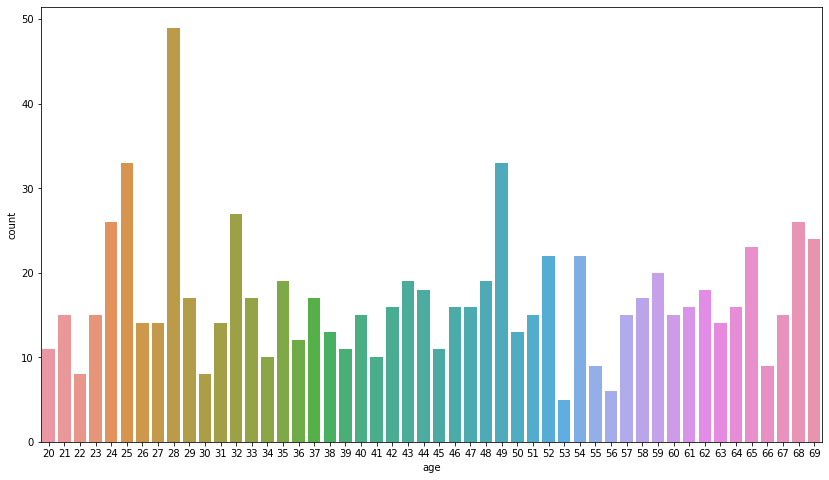

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(computer_success.age)

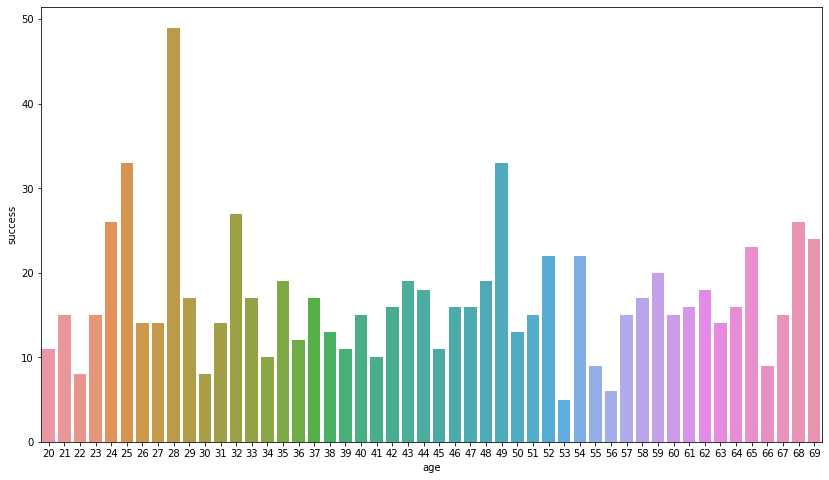

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x=dist_success_by_age.age, y=dist_success_by_age.success)

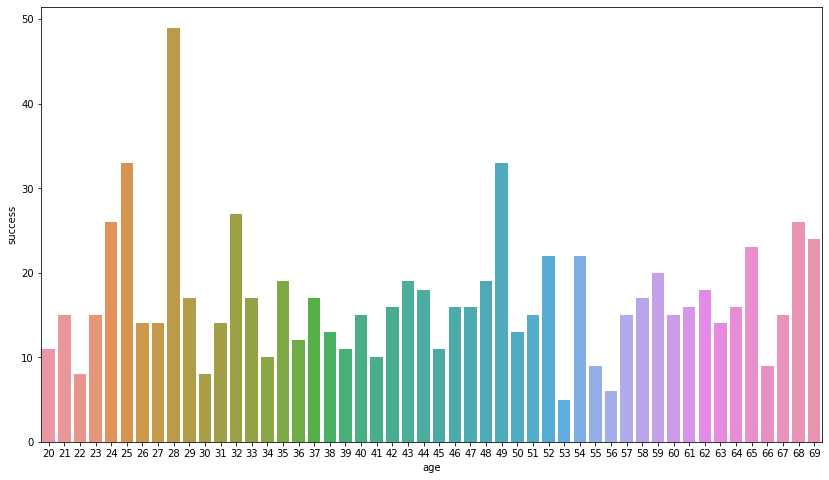

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=dist_success_by_age, x='age', y='success')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


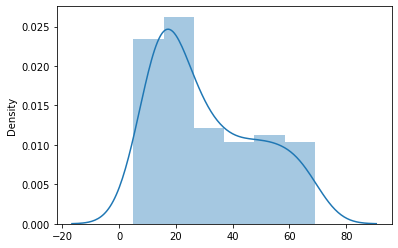

In [ ]:
sns.distplot(dist_success_by_age)